## Student Information
Name: Alapati Rick Minute Taupo

Student ID: 107065422

GitHub ID:

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [2]:
### Begin Assignment Here!
import pandas as pd
dfa = pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=['sentiment','score'])
dfa['source']='Amazon'
dfa[0:5]

,sentiment,score,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon


In [3]:
dfi = pd.read_csv('imdb_labelled.txt', engine='python', sep='  \t', names=['sentiment','score'])
dfi['source']='IMDB'
dfi[0:25]
#This reveals that data from dfi[19,20] missing lines 21-81 of txt

,sentiment,score,source
0,"A very, very, very slow-moving, aimless movie ...",0,IMDB
1,Not sure who was more lost - the flat characte...,0,IMDB
2,Attempting artiness with black & white and cle...,0,IMDB
3,Very little music or anything to speak of.,0,IMDB
4,The best scene in the movie was when Gerardo i...,1,IMDB
5,"The rest of the movie lacks art, charm, meanin...",0,IMDB
6,Wasted two hours.,0,IMDB
7,Saw the movie today and thought it was a good ...,1,IMDB
8,A bit predictable.,0,IMDB
9,Loved the casting of Jimmy Buffet as the scien...,1,IMDB


In [4]:
dfy = pd.read_csv('yelp_labelled.txt', sep='\t', names=['sentiment','score'])
dfy['source']='Yelp'
dfy[0:5]

,sentiment,score,source
0,Wow... Loved this place.,1,Yelp
1,Crust is not good.,0,Yelp
2,Not tasty and the texture was just nasty.,0,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp


In [5]:
print(dfa.score.value_counts())
print(dfi.score.value_counts())
print(dfy.score.value_counts())

1    500
0    500
Name: score, dtype: int64
1    500
0    500
Name: score, dtype: int64
1    500
0    500
Name: score, dtype: int64


In [6]:
len(dfi)

1000

In [7]:
dfi

,sentiment,score,source
0,"A very, very, very slow-moving, aimless movie ...",0,IMDB
1,Not sure who was more lost - the flat characte...,0,IMDB
2,Attempting artiness with black & white and cle...,0,IMDB
3,Very little music or anything to speak of.,0,IMDB
4,The best scene in the movie was when Gerardo i...,1,IMDB
5,"The rest of the movie lacks art, charm, meanin...",0,IMDB
6,Wasted two hours.,0,IMDB
7,Saw the movie today and thought it was a good ...,1,IMDB
8,A bit predictable.,0,IMDB
9,Loved the casting of Jimmy Buffet as the scien...,1,IMDB


In [8]:
import helpers.data_mining_helpers as dmh

dfa.isnull().apply(lambda x: dmh.check_missing_values(x))

# dmh.check_missing_values(df['Score'])

sentiment    (The amount of missing records is: , 0)
score        (The amount of missing records is: , 0)
source       (The amount of missing records is: , 0)
dtype: object

In [9]:
sum(dfa['sentiment'].duplicated())

10

In [10]:
# ids = df["sentiment"]
# df[ids.isin(ids[ids.duplicated()])].sort(df["sentiment"])

dfa[dfa.duplicated(keep=False)].sort_values("sentiment")


,sentiment,score,source
446,Does not fit.,0,Amazon
748,Does not fit.,0,Amazon
180,Don't buy this product.,0,Amazon
543,Don't buy this product.,0,Amazon
402,Excellent product for the price.,1,Amazon
892,Excellent product for the price.,1,Amazon
792,Great Phone.,1,Amazon
290,Great Phone.,1,Amazon
187,Great phone!.,1,Amazon
285,Great phone!.,1,Amazon


In [11]:
print(dfa.score.value_counts())

1    500
0    500
Name: score, dtype: int64


In [12]:
dfx = dfa.append([dfi, dfy], ignore_index=True)
print(dfx.score.value_counts())

1    1500
0    1500
Name: score, dtype: int64


In [13]:
# import helpers.data_mining_helpers as dmh

dfx.isnull().apply(lambda x: dmh.check_missing_values(x))

# dmh.check_missing_values(df['Score'])

sentiment    (The amount of missing records is: , 0)
score        (The amount of missing records is: , 0)
source       (The amount of missing records is: , 0)
dtype: object

In [14]:
dfx[dfx.sentiment.duplicated(keep=False)].sort_values("sentiment")

,sentiment,score,source
1788,10/10,1,IMDB
1125,10/10,1,IMDB
1363,Definitely worth checking out.,1,IMDB
1090,Definitely worth checking out.,1,IMDB
748,Does not fit.,0,Amazon
446,Does not fit.,0,Amazon
543,Don't buy this product.,0,Amazon
180,Don't buy this product.,0,Amazon
402,Excellent product for the price.,1,Amazon
892,Excellent product for the price.,1,Amazon


In [15]:
# drop duplicates
# dfx.drop_duplicates(keep=False, inplace=True)

In [16]:
dfx['unigrams'] = dfx['sentiment'].apply(lambda x: dmh.tokenize_text(x))
dfx.unigrams[0:4]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [17]:
list(dfx[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(dfx.sentiment)
X_counts

<3000x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31578 stored elements in Compressed Sparse Row format>

In [19]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(dfx[4:5].sentiment)))

['the', 'mic', 'is', 'great']

In [20]:
X_counts.shape

(3000, 5155)

In [21]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [22]:
count_vect.get_feature_names()[-10:]

['yucky',
 'yukon',
 'yum',
 'yummy',
 'yun',
 'z500a',
 'zero',
 'zillion',
 'zombie',
 'zombiez']

In [23]:
X_counts[-30:,-20:].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

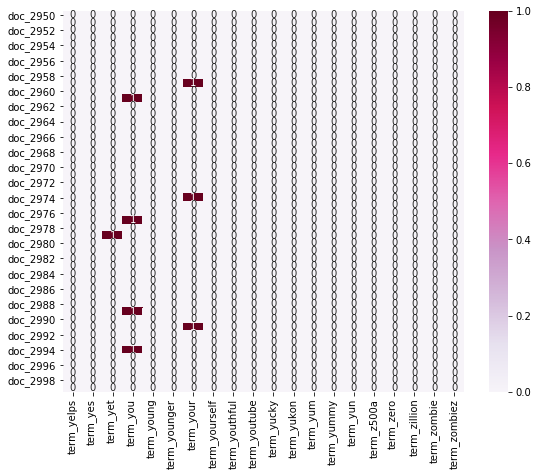

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[-20:]]
plot_y = ["doc_"+ str(i) for i in list(dfx.index)[-50:]]
plot_z = X_counts[-50:, -20:].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [25]:
from sklearn.decomposition import PCA
dfx_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
dfx_reduced.shape

(3000, 2)

In [26]:
dfx.score.unique()

array([0, 1])

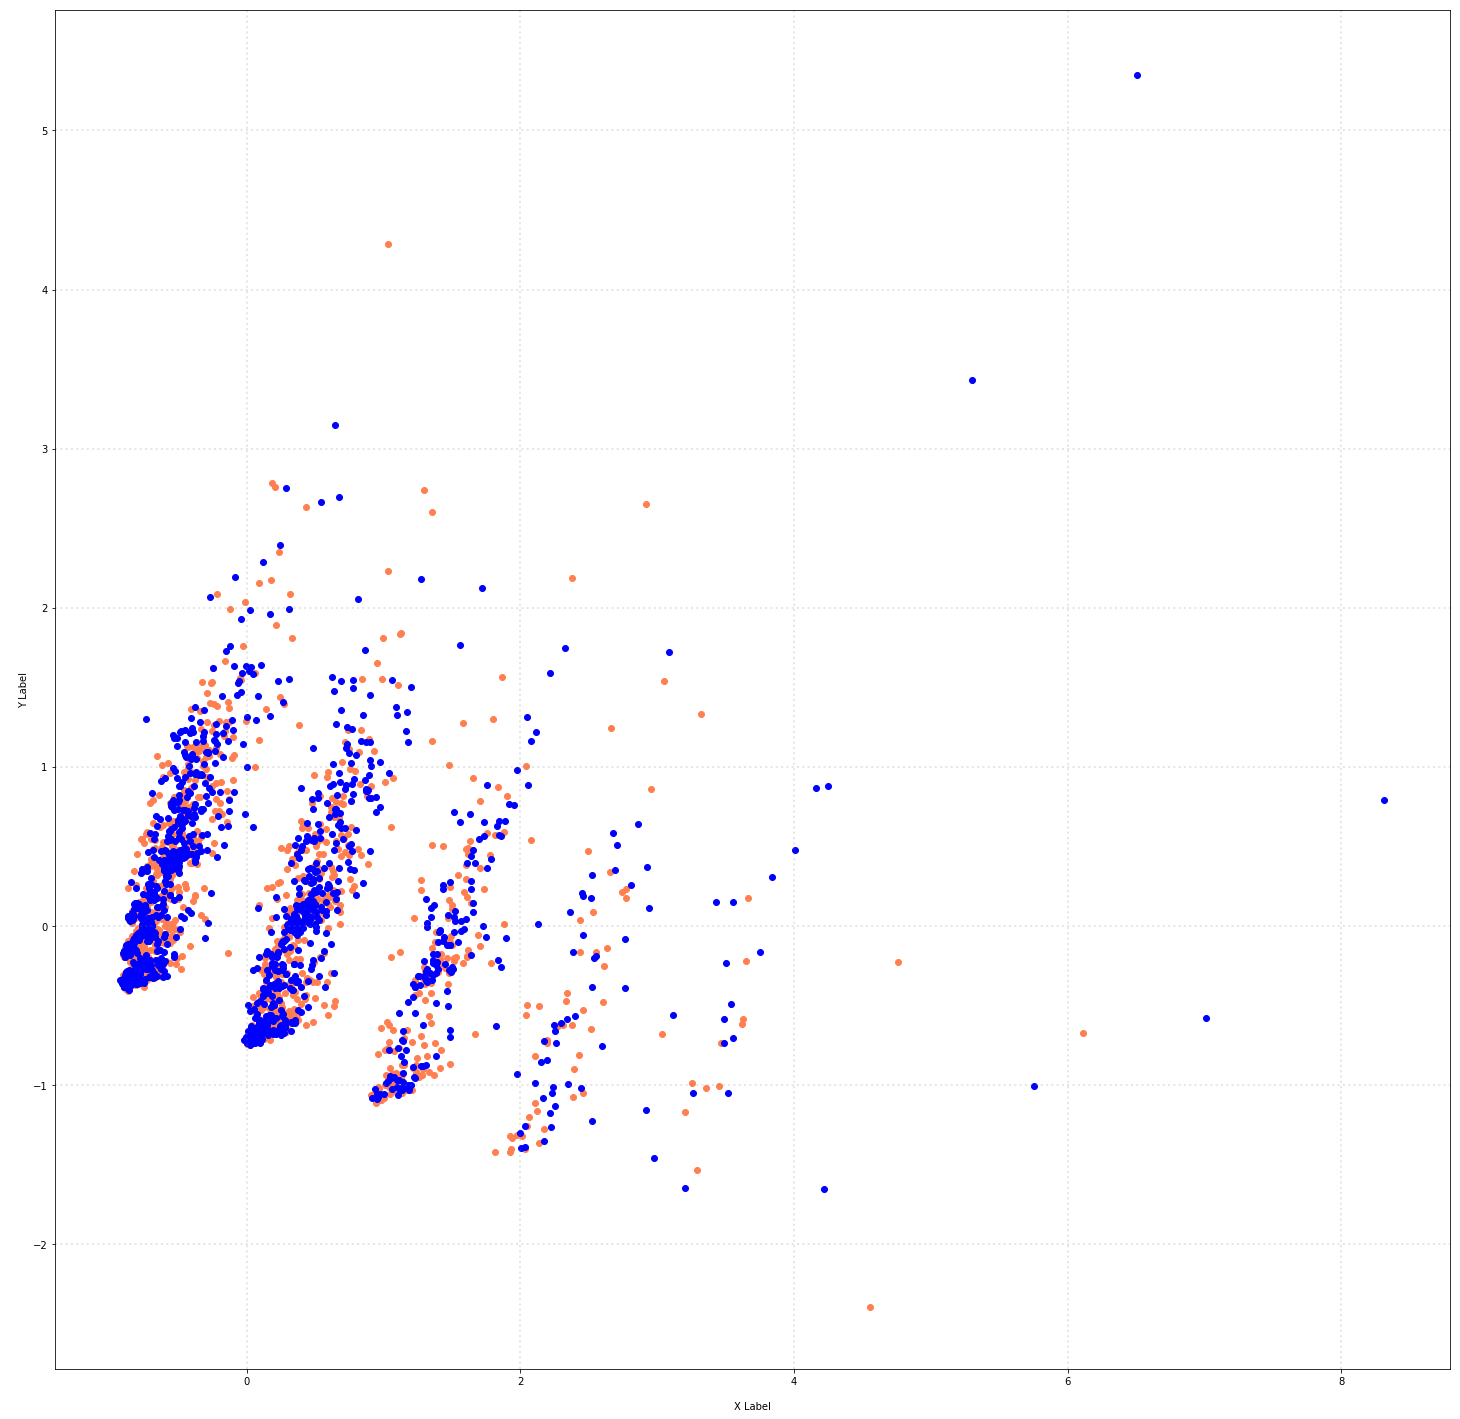

In [28]:
col = ['coral', 'blue', 'm']

# plot
fig = plt.figure(figsize = (25,25))
ax = fig.subplots()

for c, category in zip(col, dfx.score.unique()):
    xs = dfx_reduced[dfx['score'] == category].T[0]
    ys = dfx_reduced[dfx['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

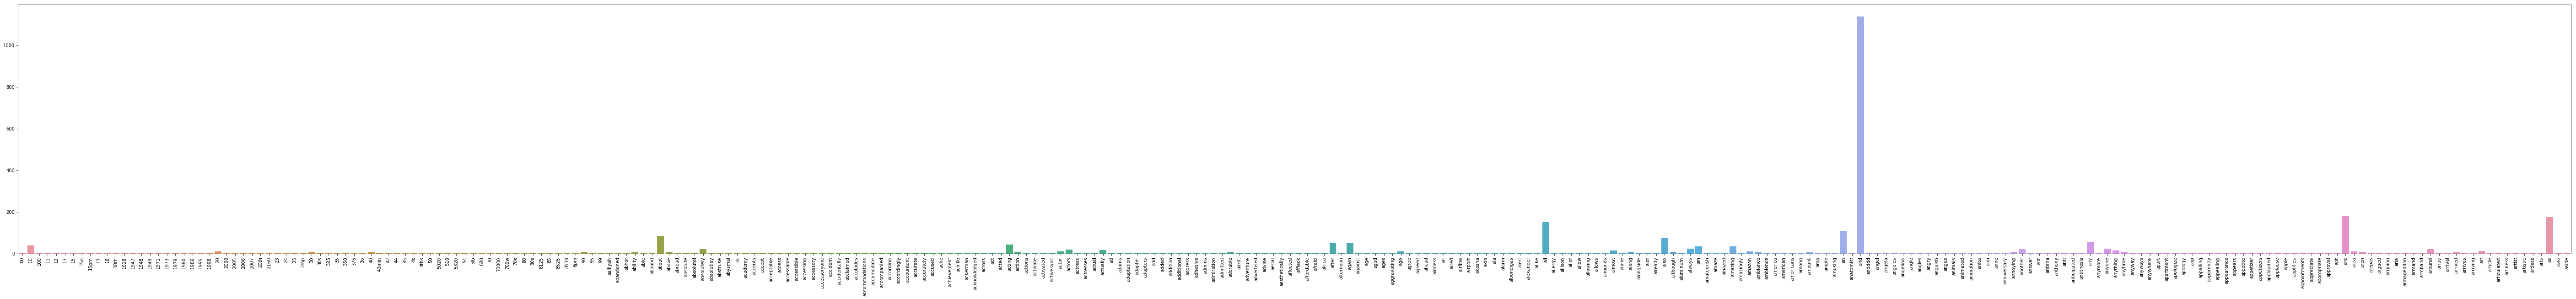

In [94]:
import numpy as np

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
    
# term_frequencies[0] 
# len(term_frequencies)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);